In [1]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [69]:
# Importing the Input Data Frame

credit_risk = pd.read_csv(r"C:\Users\adith\Desktop\DS\Projects\Project 2\Credit Risk\credit_risk_dataset.csv")

In [70]:
# Checking the data frame shape

credit_risk.shape

(32581, 12)

In [71]:
# Checking the Data Types of the Columns

credit_risk.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [72]:
# Mapping Loan Status Values to Yes (1) and No (0) for better visualization purposes

credit_risk['loan_status_coded'] = credit_risk['loan_status'].map({1: "Yes", 0: "No"})

#### **Null Handling:**

In [73]:
# Checking for Null Columns

credit_risk.isna().any()

person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length              True
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                  True
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
loan_status_coded             False
dtype: bool

In [74]:
# Checking for Null Rows

credit_risk[credit_risk.isna().any(axis = 1)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_coded
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4,Yes
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4,Yes
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4,No
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3,No
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28,Yes
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19,No
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28,No
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23,No


In [75]:
# Replacing Nulls in Loan Interest Rates by the Medians of the respective Loan Grades

credit_risk['loan_int_rate'] = credit_risk['loan_int_rate'].fillna(credit_risk.groupby('loan_grade')['loan_int_rate'].transform('median'))


In [76]:
# Replacing Nulls in Employment Length by the Median of the entire column and changing type to int from float

credit_risk['person_emp_length'] = credit_risk['person_emp_length'].fillna(credit_risk['person_emp_length'].median())
credit_risk['person_emp_length'] = credit_risk['person_emp_length'].astype(int)

In [77]:
# Checking if all null values are handled

credit_risk[credit_risk.isna().any(axis = 1)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_coded


#### **Duplicates Removal:**

In [78]:
# Checking for duplicate Rows

credit_risk[credit_risk.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_coded
15975,23,42000,RENT,5,VENTURE,B,6000,9.99,0,0.14,N,4,No
15989,23,90000,MORTGAGE,7,EDUCATION,B,8000,10.36,0,0.09,N,3,No
15995,24,48000,MORTGAGE,4,MEDICAL,A,4000,5.42,0,0.08,N,4,No
16025,24,10000,RENT,8,PERSONAL,A,3000,7.90,1,0.30,N,3,Yes
16028,23,100000,MORTGAGE,7,EDUCATION,A,15000,7.88,0,0.15,N,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12,No
32047,36,250000,RENT,2,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17,No
32172,49,120000,MORTGAGE,12,MEDICAL,B,12000,10.99,0,0.10,N,12,No
32259,39,40000,OWN,4,VENTURE,B,1000,10.37,0,0.03,N,16,No


In [79]:
# Dropping Duplicates and confirming once again if duplicate rows are dropped

credit_risk.drop_duplicates(inplace = True)
credit_risk[credit_risk.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_coded


In [80]:
# Descriptive Stats for all the numerical columns

credit_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.768880,9593.845632,11.020159,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.090411,6322.730241,3.213380,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.000000,5000.000000,7.880000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.000000,12250.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


#### **Numerical Columns' Distribution:**

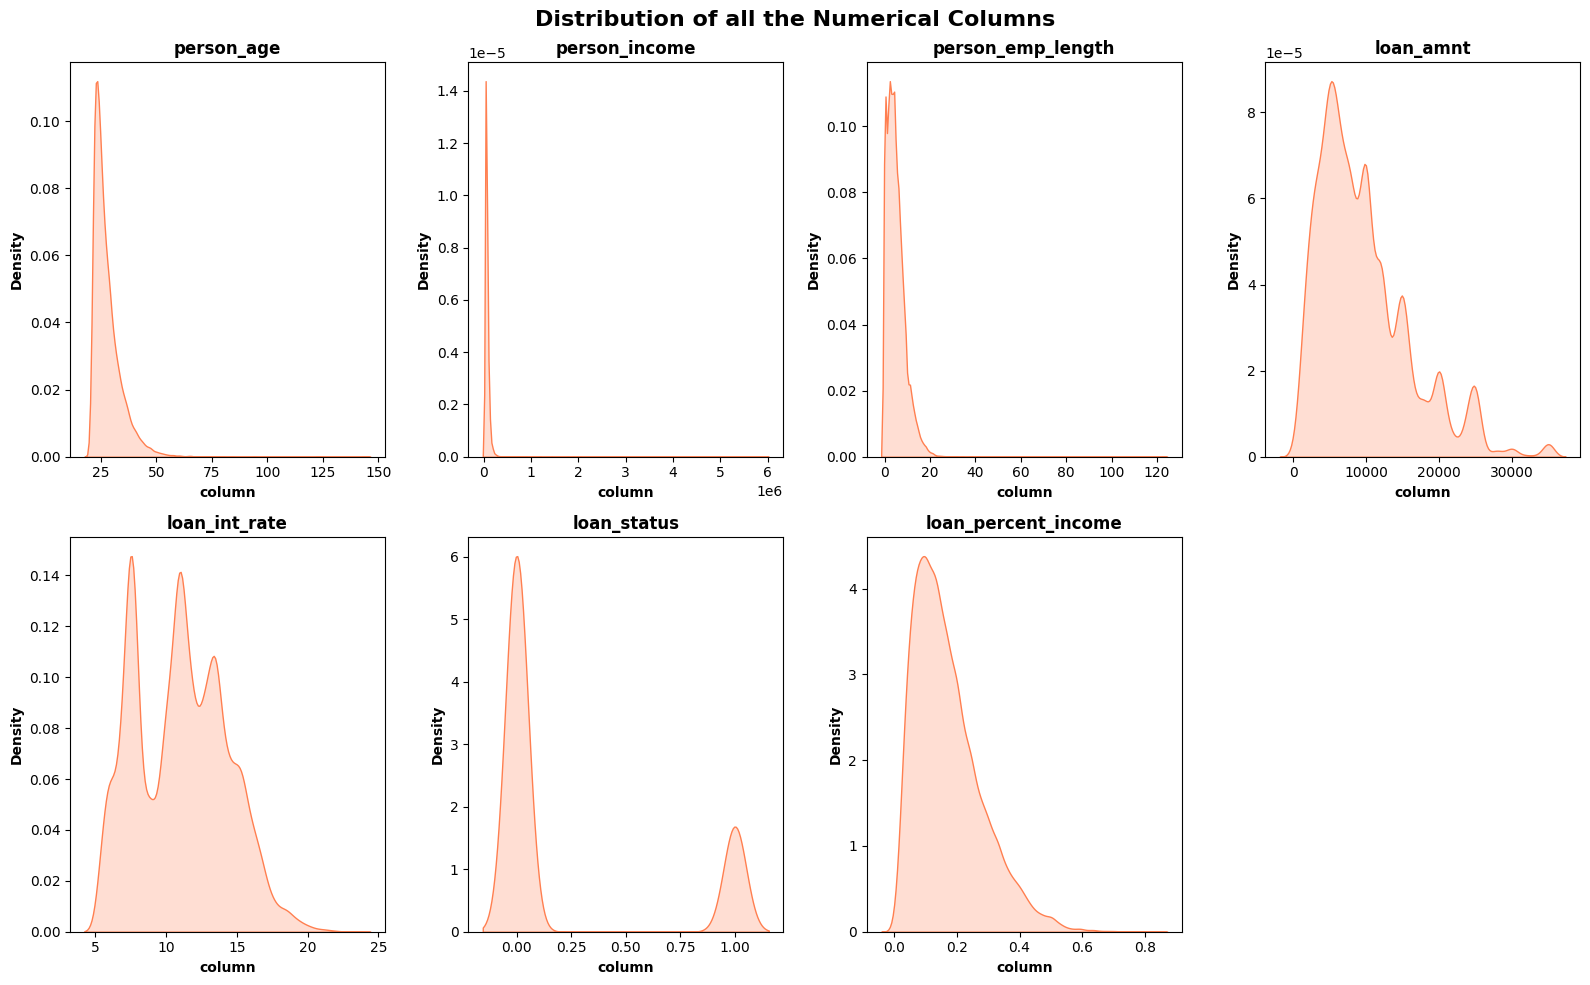

In [81]:
# Plotting KDE Plots for all the Numerical Columns

num_cols = credit_risk.select_dtypes(include = [int, float]).columns
fig, ax = plt.subplots(2, 4, figsize = (16, 10))
plt.suptitle("Distribution of all the Numerical Columns", size = 16, weight = 'bold')
for column in num_cols:
    plt.subplot(2, 4, num_cols.get_loc(column) + 1)
    plt.title(f"{column}", weight = 'bold')
    sns.kdeplot(data = credit_risk, x = credit_risk[column], fill = True, color = "#FF7F50")
    plt.xlabel("column", weight = 'bold')
    plt.ylabel("Density", weight = 'bold')
plt.tight_layout()
ax[1][3].set_visible(False) 
plt.show()

#### **Numerical Columns' Relationship:**

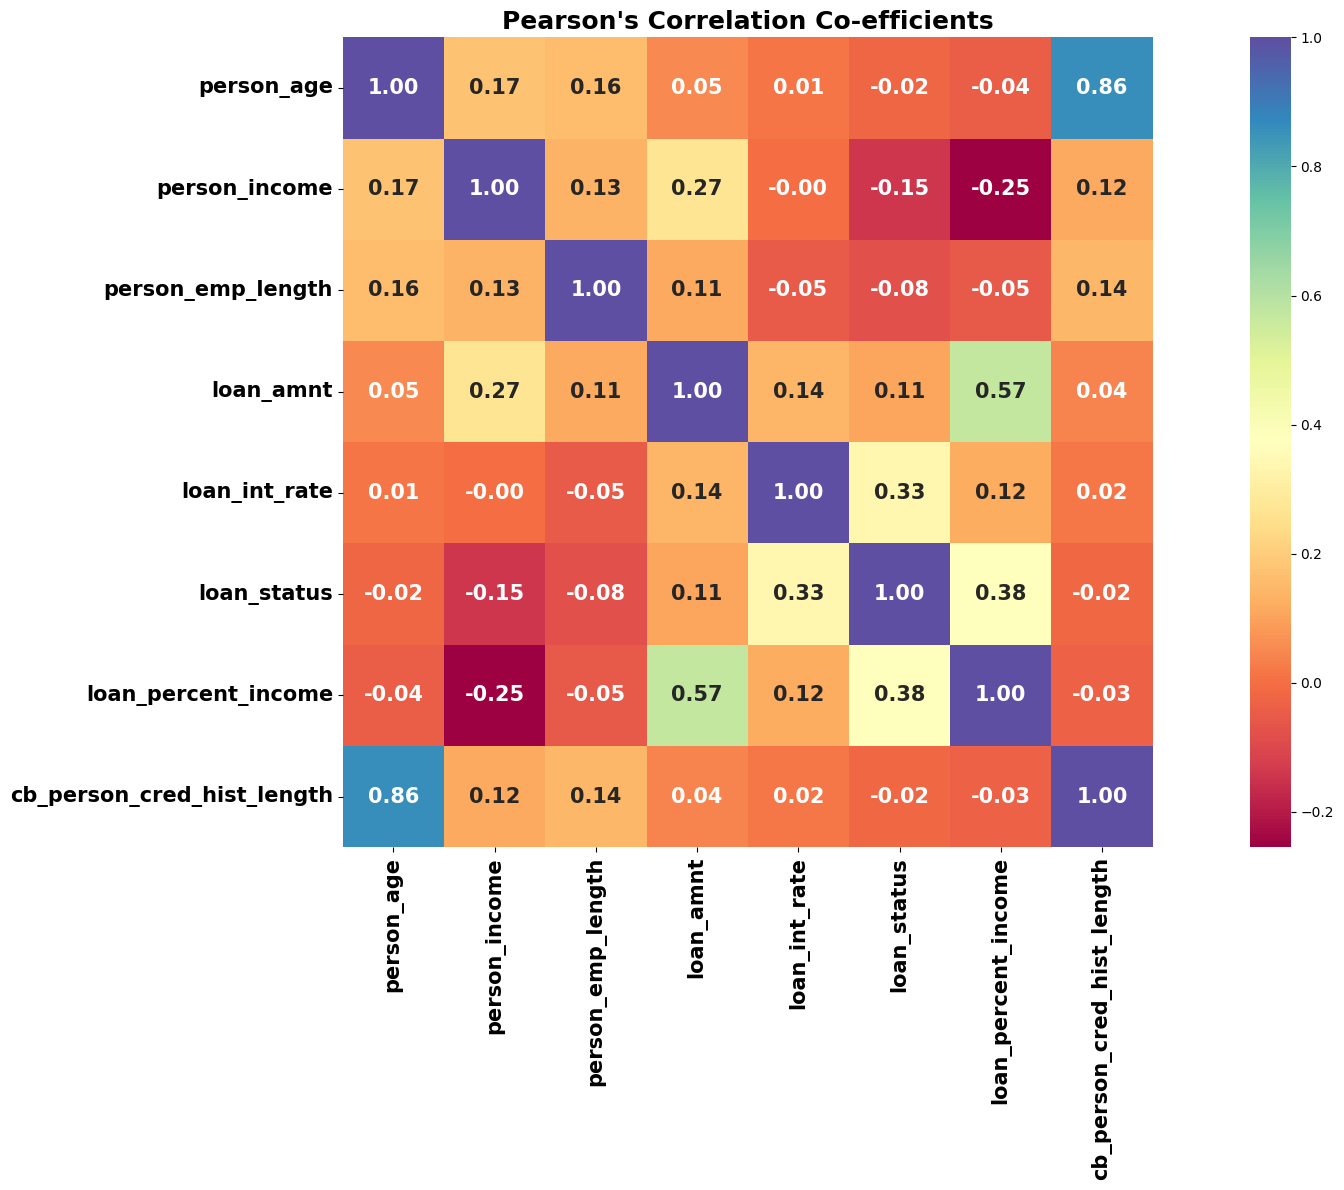

In [82]:
# Checking the relationship between all numerical columns using pearson's correlation co-efficient

fig, ax = plt.subplots(1, 1, figsize = (20, 12))
ax.set_title("Pearson's Correlation Co-efficients", weight = 'bold', size = 18)
sns.heatmap(credit_risk[num_cols].corr(), annot = True, cmap = 'Spectral', square = True, 
            annot_kws = {"weight": "bold", 'size': 15}, fmt = '.2f', ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), weight = 'bold', size = 15)
ax.set_yticklabels(ax.get_yticklabels(), weight = 'bold', size = 15)
plt.tight_layout()
plt.show()

#### **Outlier Detection and Cleaning:**

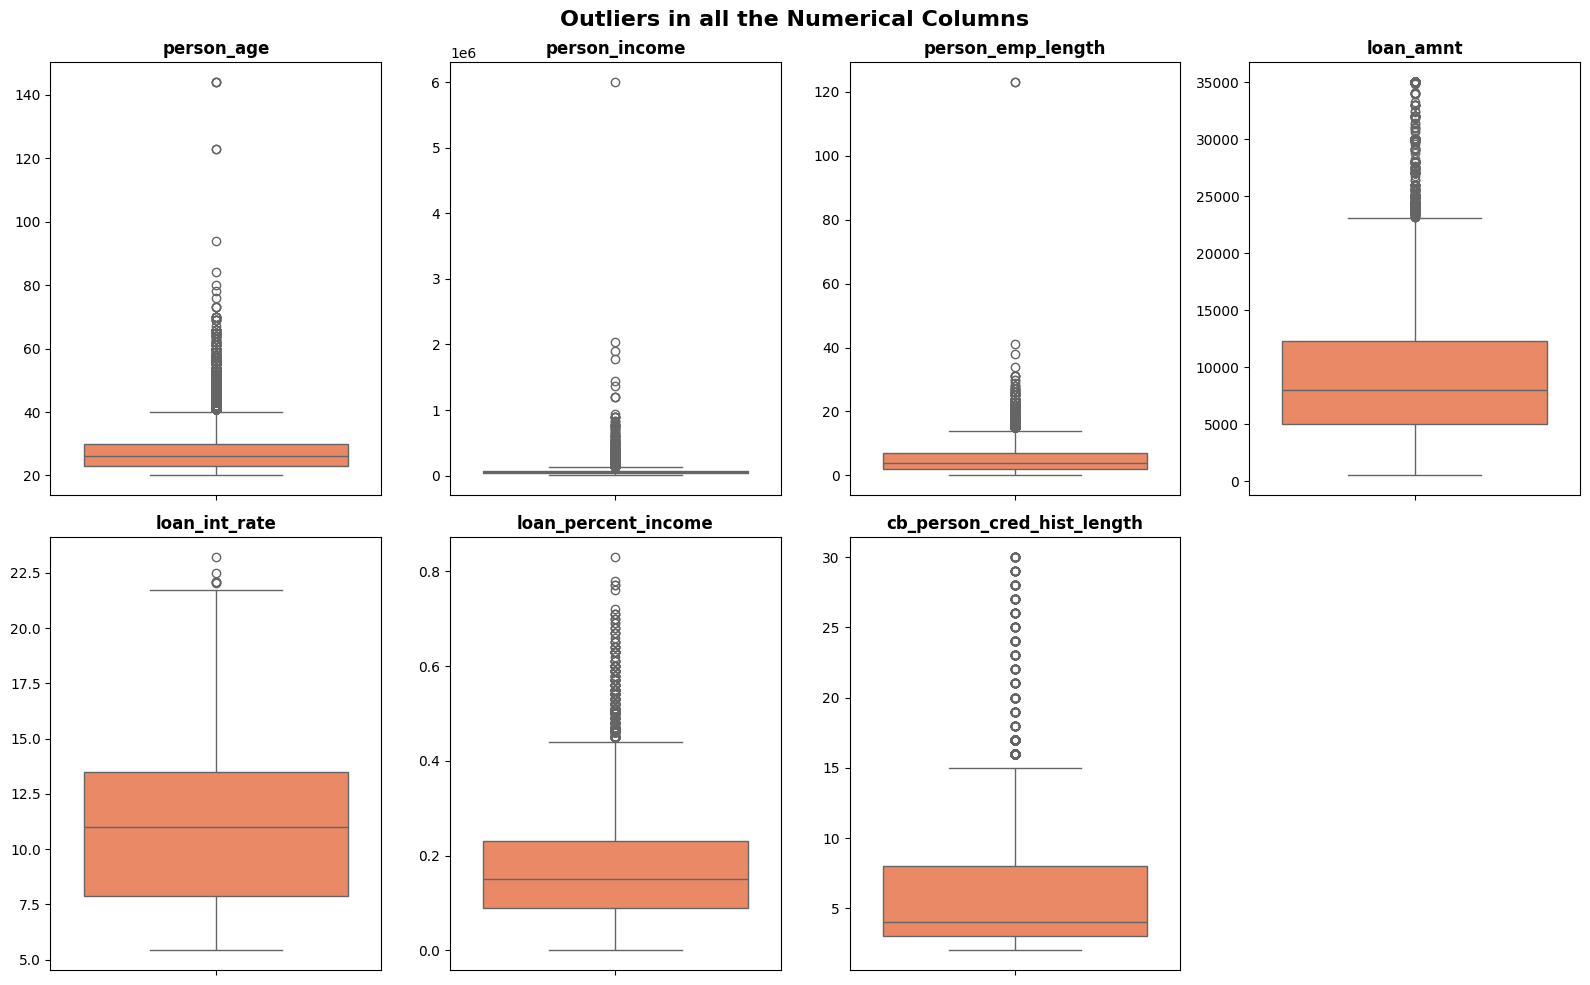

In [83]:
# Plotting Box Plots for all the numerical columns to visualize outliers

fig, ax = plt.subplots(2, 4, figsize = (16, 10))
plt.suptitle("Outliers in all the Numerical Columns", size = 16, weight = 'bold')
for column in num_cols.drop('loan_status'):
    plt.subplot(2, 4, num_cols.drop('loan_status').get_loc(column) + 1)
    plt.title(f"{column}", weight = 'bold')
    sns.boxplot(data = credit_risk, y = credit_risk[column], color = "#FF7F50")
    plt.ylabel("")
ax[1][3].set_visible(False)
plt.tight_layout()
plt.show()

In [84]:
# Defining a function to cap outliers

def cap_outliers(df, column_list):
    outlier_stats = pd.DataFrame()
    for column_name in column_list:
        q1 = df[column_name].quantile(.25)
        q3 = df[column_name].quantile(.75)
        iqr = q3 - q1
        upper = q3 + (1.5 * iqr)
        lower = q1 - (1.5 * iqr)
        upper_capped = sum(df[column_name].transform(lambda x: 1 if x < lower else 0))
        lower_capped = sum(df[column_name].transform(lambda x: 1 if x > upper else 0))
        df[column_name] = df[column_name].transform(lambda x: lower if x < lower else upper if x > upper else x)
        s = pd.Series({"Column Name": column_name, "Q1": q1, "Q3": q3, "IQR": iqr, "Lower Bound": lower, "Upper Bound": upper, "Observations below Lower Bound": upper_capped, "Observations above Upper Bound": lower_capped})
        outlier_stats = pd.concat([outlier_stats, s.to_frame().transpose()], axis = 0).reset_index(drop = True)
    return outlier_stats

In [85]:
# Calling the function and printing the summary of the outlier cappings

cap_outliers(credit_risk, num_cols.drop('loan_status'))

,Column Name,Q1,Q3,IQR,Lower Bound,Upper Bound,Observations below Lower Bound,Observations above Upper Bound
0,person_age,23.0,30.0,7.0,12.5,40.5,0,1491
1,person_income,38542.0,79218.0,40676.0,-22472.0,140232.0,0,1478
2,person_emp_length,2.0,7.0,5.0,-5.5,14.5,0,852
3,loan_amnt,5000.0,12250.0,7250.0,-5875.0,23125.0,0,1679
4,loan_int_rate,7.88,13.48,5.6,-0.52,21.88,0,6
5,loan_percent_income,0.09,0.23,0.14,-0.12,0.44,0,650
6,cb_person_cred_hist_length,3.0,8.0,5.0,-4.5,15.5,0,1139


In [86]:
# Descriptive Stats for all the numerical columns after outlier handling

credit_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,27.451922,62437.029831,4.682718,9418.433027,11.020072,0.218688,0.168854,5.712441
std,5.274139,31807.394422,3.719366,5828.477669,3.213076,0.413363,0.102395,3.713420
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,38542.000000,2.000000,5000.000000,7.880000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,79218.000000,7.000000,12250.000000,13.480000,0.000000,0.230000,8.000000
max,40.500000,140232.000000,14.500000,23125.000000,21.880000,1.000000,0.440000,15.500000


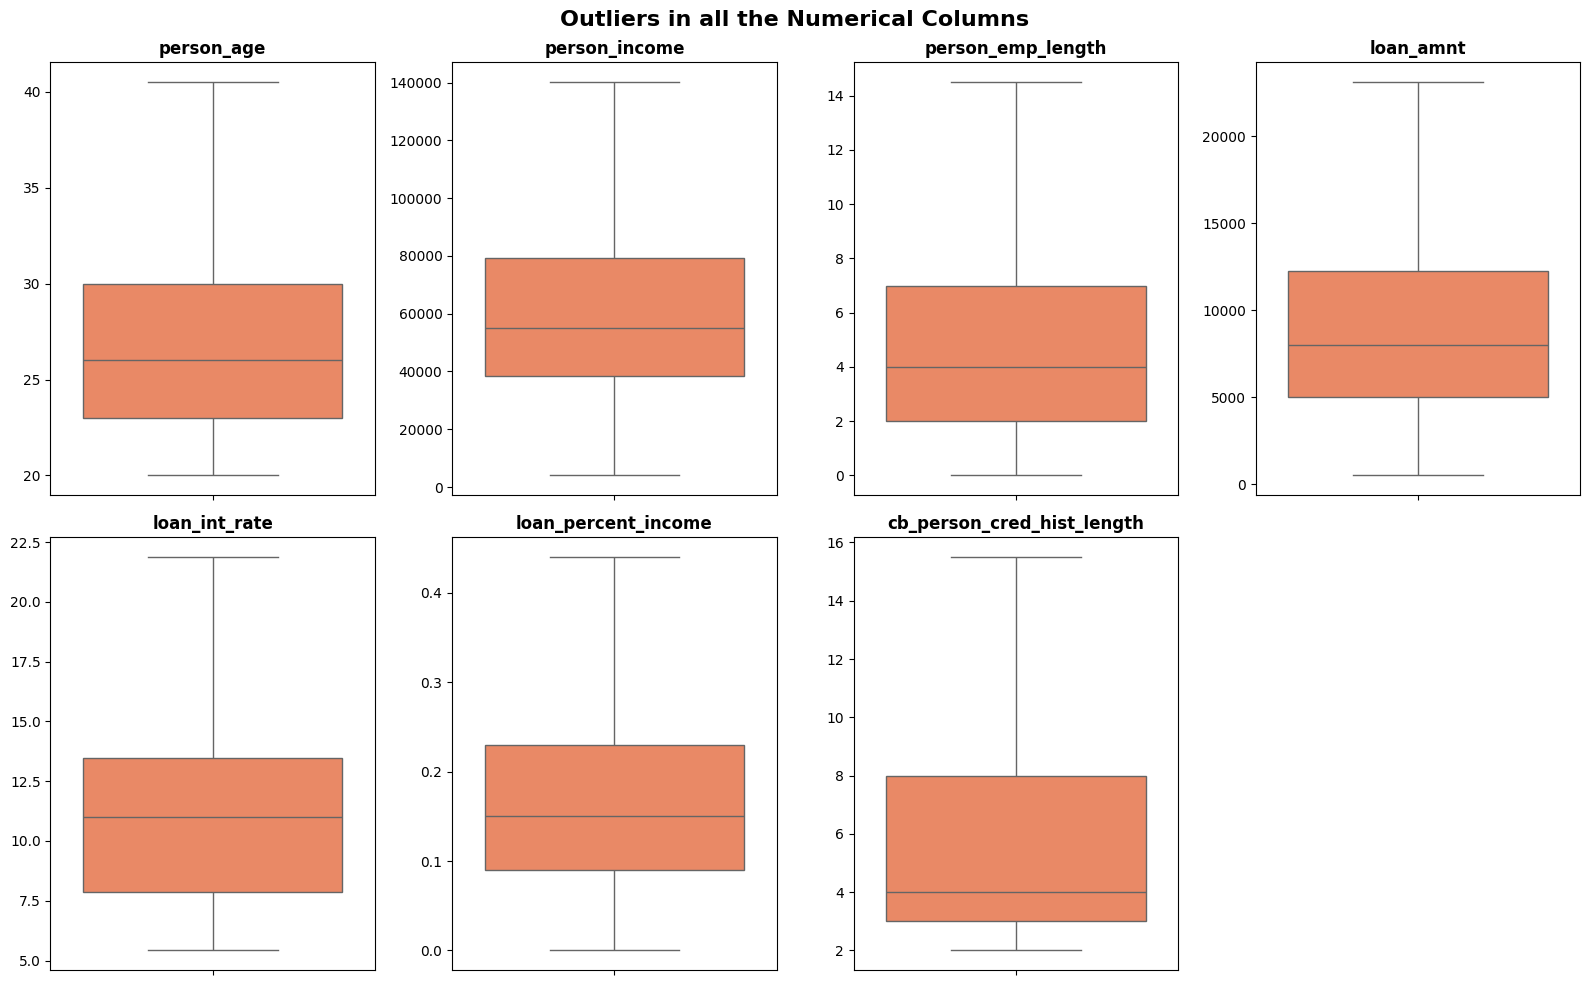

In [87]:
# Plotting Box Plots for all the numerical columns to check if ouliers are handled

fig, ax = plt.subplots(2, 4, figsize = (16, 10))
plt.suptitle("Outliers in all the Numerical Columns", size = 16, weight = 'bold')
for column in num_cols.drop('loan_status'):
    plt.subplot(2, 4, num_cols.drop('loan_status').get_loc(column) + 1)
    plt.title(f"{column}", weight = 'bold')
    sns.boxplot(data = credit_risk, y = credit_risk[column], color = "#FF7F50")
    plt.ylabel("")
ax[1][3].set_visible(False)
plt.tight_layout()
plt.show()

#### **Normality Visualization Function:**

In [88]:
# Defining a function to visualize normality test

def normality_test(column_name):
    if column_name not in credit_risk.columns:
        raise Exception("Column name is not present in the Credit Risk Data Frame. Please enter the correct Column name with the exact nomenclature as present in the data frame.")
    else:
        fig, ax = plt.subplots(1, 2, figsize = (10, 5))
        plt.suptitle("Test for Normality - "+ column_name, weight = 'bold')
        ax[0].set_title("Quantile-Quantitle Plot", weight = 'bold', size = 8)
        sm.qqplot(stats.zscore(credit_risk[column_name]), dist = stats.norm, line = '45', ax = ax[0])
        ax[0].set_xlabel(ax[0].get_xlabel(), weight = 'bold', size = 8)
        ax[0].set_ylabel(ax[0].get_ylabel(), weight = 'bold', size = 8)
        stats.probplot(credit_risk[column_name], dist = 'norm', fit = True, plot = ax[1])
        ax[1].set_title("Probability Plot", weight = 'bold', size = 8)
        ax[1].set_xlabel(ax[1].get_xlabel(), weight = 'bold', size = 8)
        ax[1].set_ylabel(ax[1].get_ylabel(), weight = 'bold', size = 8)
        plt.tight_layout()
        plt.show()

#### **Confidence Intervals and Significance Limits:**

In [89]:
# Defining a function to define and compute confidence levels and significance limits

confidence_input = input("Enter the Confidence Level (Percentage) for the Experiments:")
if confidence_input.__contains__('.'):
    confidence_level = float(confidence_input)
    if confidence_level > 1 or confidence_level < 0:
        raise Exception("Please Enter a Confidence Limit between 0 and 1")
else:
    confidence_level = float(confidence_input.strip(' %')) / 100
    if confidence_level > 1 or confidence_level < 0:
        raise Exception("Please Enter a Confidence Limit between 0% and 100%")
alpha = round(1 - confidence_level, 2)
print("\nConfidence Level:", confidence_level)
print("\nSignificance Limit:", alpha)


Confidence Level: 0.95

Significance Limit: 0.05


# Business Questions:

#### 1. Does age groups (young adults vs middle-aged vs seniors) significantly impact loan defaults?

In [158]:
# Discretization of Age column into 3 categories

bins = [20, 35, 60, np.inf]
labels = ["Young Adults", "Middle Age", "Seniors"]
credit_risk['age_group'] = pd.cut(x = credit_risk['person_age'], bins = bins, labels = labels, \
                                  include_lowest = True).cat.remove_unused_categories()

In [159]:
# Creating a contigency table between Age Group and Loan Defaults

contingency_table = pd.crosstab(credit_risk['age_group'], credit_risk['loan_status_coded'])
contingency_table

loan_status_coded,No,Yes
age_group,,
Young Adults,22592,6364
Middle Age,2735,725


#### Test to be performed: **Chi-squared Test for the Test of Independence**

#### Hypotheses:

#### H0: There is no relationship between age group and the loan defaults.
#### H1: There is a relationship between age group and the loan defaults.

In [160]:
# Performing Chi-Squared Test for Independence and computing the P-value

test_statistic, p_value = stats.chi2_contingency(contingency_table.values)[:2]
print("Chi-Squared Test Statistic:", round(test_statistic, 2))
print("\nAlpha:", alpha)
print("\nP-Value:", round(p_value, 2))
if(p_value < alpha):
    print("\nConclusion: Reject H0 and conclude that there is a relationship between age group and the loan defaults.")
else:
    print("\nConclusion: Fail to reject H0 and conclude that there is no relationship between age group and the loan defaults.")

Chi-Squared Test Statistic: 1.84

Alpha: 0.05

P-Value: 0.18

Conclusion: Fail to reject H0 and conclude that there is no relationship between age group and the loan defaults.


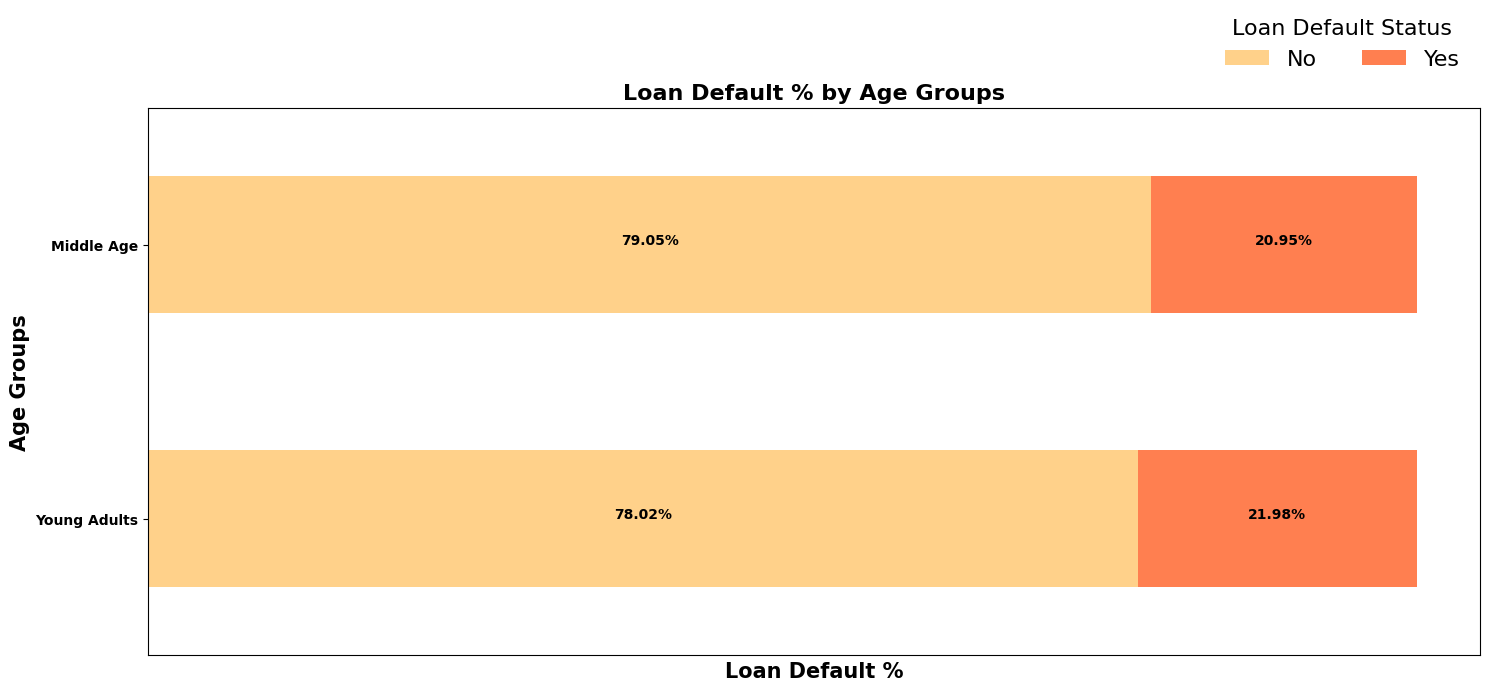

In [93]:
# Plotting a stacked bar chart to visualize the Percentage of loan defaults by Age Groups

contingency_percent = round(contingency_table.divide(contingency_table.sum(axis = 1), axis = 0) * 100, 2)
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
contingency_percent.plot(kind = 'barh', stacked = True, color = ["#FFD18A", "#FF7F50"], ax = ax)
plt.title("Loan Default % by Age Groups", weight = 'bold', size = 16)
plt.legend(title = 'Loan Default Status', ncols = 2, bbox_to_anchor = (1, 1.2), labels = ["No", "Yes"], 
           fontsize = 16, frameon = False, title_fontsize = 16)
plt.xlabel("Loan Default %", weight = 'bold', size = 15)
plt.xticks([])
plt.ylabel("Age Groups", weight = 'bold', size = 15)
plt.yticks(ax.get_yticks(), rotation = 0, weight = 'bold', size = 10)
for bars in ax.patches:
    if bars.get_height() > 0:
        height = bars.get_height()
        width = bars.get_width()
        x, y = bars.get_xy()
        ax.text(x = x + width / 2 , y = y + height / 2, s = str(round(width, 2)) + '%', ha = 'center', 
                weight = 'bold', size = 10)
plt.tight_layout()
plt.show()

#### **Conclusion:**

#### Age Group is not a factor that has a significant impact on the loan default status. Both the age groups have almost similar default rates.

---
---
---
---

### 2. Which loan_intent (e.g., Medical, Education, Personal) carries the highest inherent default risk, and should our underwriting team subject these applications to greater scrutiny?

In [162]:
# Creating a contigency table between Loan Intent and Loan Default Status

contingency_table = pd.crosstab(credit_risk['loan_intent'], credit_risk['loan_status_coded'])
contingency_table

loan_status_coded,No,Yes
loan_intent,,
DEBTCONSOLIDATION,3701,1488
EDUCATION,5305,1106
HOMEIMPROVEMENT,2654,940
MEDICAL,4425,1617
PERSONAL,4404,1094
VENTURE,4838,844


#### Test to be performed: **Chi-Squared Test for the Test of Independence**.

#### Hypotheses:

#### H0: There is no relationship between loan intent and loan defaults.
#### H1: There is a relationship between loan intent and defaults.

In [164]:
# Performing Chi-Squared Test for Independence and computing the P-value

chi_squared_statistic, p_value = stats.chi2_contingency(contingency_table.values)[:2]
print("Chi-Squared Test Statistic:", round(chi_squared_statistic, 2))
print("\nAlpha:", alpha)
print("\nP-Value:", p_value)
if(p_value < alpha):
    print("\nConclusion: Reject H0 and conclude that there is a relationship between loan intent and loan defaults.")
else:
    print("\nConclusion: Fail to reject H0 and conclude that there is no relationship between loan intent and loan defaults.")

Chi-Squared Test Statistic: 520.18

Alpha: 0.05

P-Value: 3.512381898003749e-110

Conclusion: Reject H0 and conclude that there is a relationship between loan intent and loan defaults.


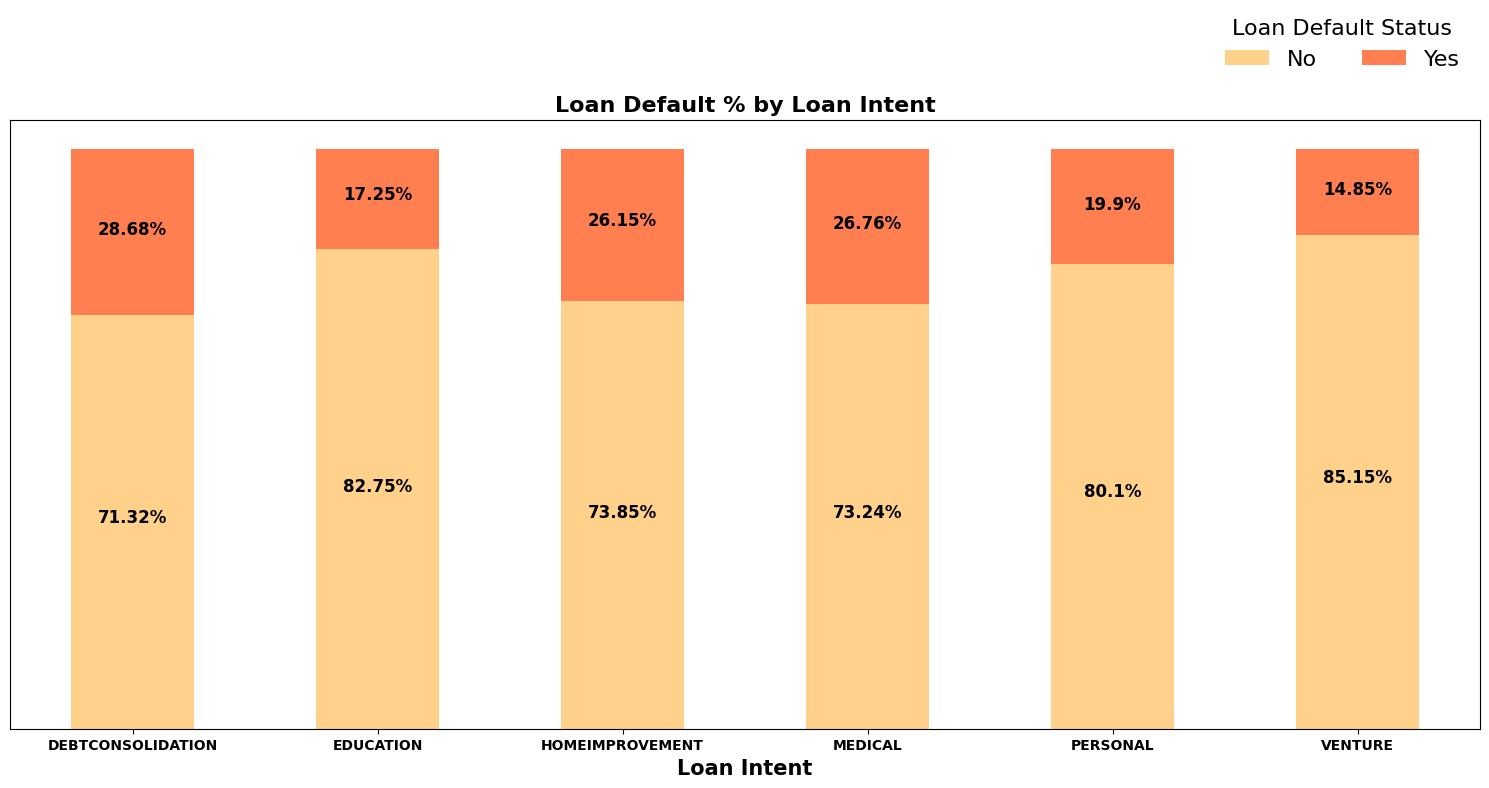

In [96]:
# Plotting a stacked bar chart to visualize the Percentage of loan defaults by Loan Intent

contingency_percent = round(contingency_table.divide(contingency_table.sum(axis = 1), axis = 0) * 100, 2)
fig, ax = plt.subplots(1, 1, figsize = (15, 8))
contingency_percent.plot(kind = 'bar', stacked = True, color = ["#FFD18A", "#FF7F50"] ,ax = ax)
plt.title("Loan Default % by Loan Intent", weight = 'bold', size = 16)
plt.legend(title = 'Loan Default Status', ncols = 2, bbox_to_anchor = (1, 1.2), labels = ["No", "Yes"], 
           fontsize = 16, frameon = False, title_fontsize = 16)
plt.xlabel("Loan Intent", weight = 'bold', size = 15)
plt.xticks(ax.get_xticks(), rotation = 0, weight = 'bold', size = 10)
plt.yticks([])
for bars in ax.patches:
    if bars.get_height() > 0:
        height = bars.get_height()
        width = bars.get_width()
        x, y = bars.get_xy()
        ax.text(x = x + width / 2, y = y + int(height) / 2, s = str(round(float(height), 2)) + "%", 
                ha = 'center', weight = 'bold', size = 12)
plt.tight_layout()
plt.show()

#### **Conclusion:**

#### Loan Intent is a factor that impacts the loan status. There are 6 types of loan intents in this experiment and the following can be inferred:

#### * Medical is the loan intent with the highest default rate.
#### * Venture is the loan intent with the lowest default rate.

#### In general, loans with intent as Medical, Debt Consolidation or Home Improvements should be imposed to greater scrutiny.

---
---
---
---

### 3. Does loan grade accurately reflect default risk?

In [167]:
# Creating a contigency table between Loan Grade and Loan Default Status

contingency_table = pd.crosstab(credit_risk['loan_grade'], credit_risk['loan_status_coded'])
contingency_table

loan_status_coded,No,Yes
loan_grade,,
A,9637,1066
B,8692,1695
C,5102,1336
D,1482,2138
E,342,621
F,71,170
G,1,63


In [168]:
# Performing Chi-Squared Test for Independence and computing the P-value

chi_squared_statistic, p_value = stats.chi2_contingency(contingency_table)[:2]
print("Chi-Squared Test Statistic:", round(chi_squared_statistic, 2))
print("\nAlpha:", alpha)
print("\nP-Value:", p_value)
if(p_value < alpha):
    print("\nConclusion: Reject H0 and conclude that there is a relationship between loan grade and loan defaults.")
else:
    print("\nConclusion: Fail to reject H0 and conclude that there is no relationship between loan grade and loan defaults.")


Chi-Squared Test Statistic: 5588.33

Alpha: 0.05

P-Value: 0.0

Conclusion: Reject H0 and conclude that there is a relationship between loan grade and loan defaults.


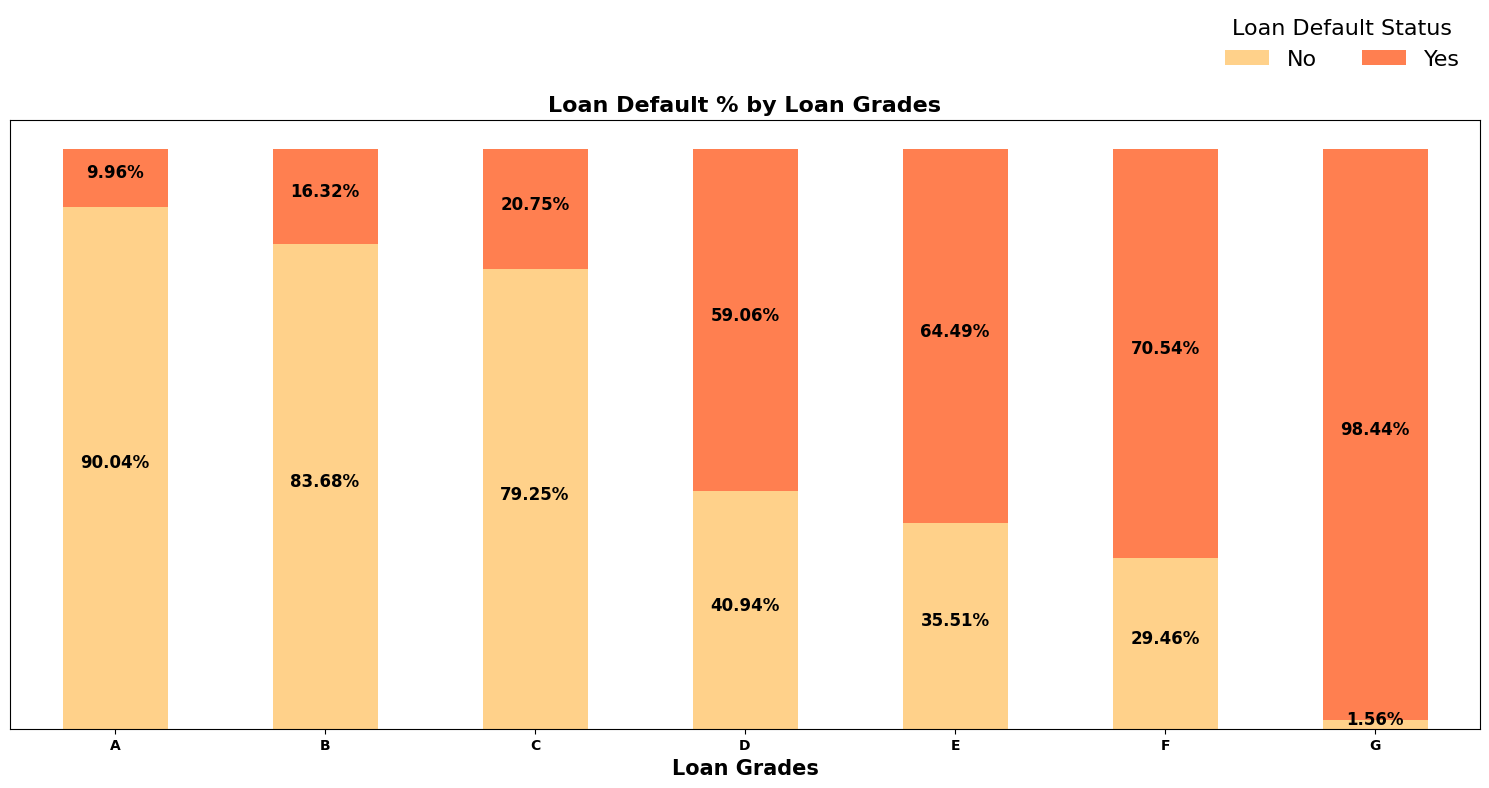

In [99]:
# Plotting a stacked bar chart to visualize the Percentage of loan defaults by Loan Grade

contingency_percent = round(contingency_table.divide(contingency_table.sum(axis = 1), axis = 0) * 100, 2)
fig, ax = plt.subplots(1, 1, figsize = (15, 8))
contingency_percent.plot(kind = 'bar', stacked = True, color = ["#FFD18A", "#FF7F50"], ax = ax)
plt.title("Loan Default % by Loan Grades", weight = 'bold', size = 16)
plt.legend(title = 'Loan Default Status', ncols = 2, bbox_to_anchor = (1, 1.2), labels = ["No", "Yes"], 
           fontsize = 16, frameon = False, title_fontsize = 16)
plt.xlabel("Loan Grades", weight = 'bold', size = 15)
plt.xticks(ax.get_xticks(), rotation = 0, weight = 'bold', size = 10)
plt.yticks([])
for bars in ax.patches:
    if bars.get_height() > 0:
        height = bars.get_height()
        width = bars.get_width()
        x, y = bars.get_xy()
        ax.text(x = x + width / 2 , y = y + height / 2, s = str(round(height, 2)) + '%', ha = 'center', 
                weight = 'bold', size = 12)
plt.tight_layout()
plt.show()

#### **Conclusion:**

#### Loan Grade significantly affects the loan status. There are 7 types of loan grades in this experiment and the following can be inferred:

#### * G is the loan grade with the highest default rate.
#### * A is the loan grade with the lowest default rate.

#### Loan Applications especially having grades E, F and G should be carefully inspected and sanctioned.

---
---
---
---

### 4. Is there a difference in the default rates between the home owners and home renters?

In [169]:
# Creating a contigency table between Home Ownership and Loan Default Status

home_ownership = credit_risk[credit_risk['person_home_ownership'].isin(['OWN', 'RENT'])]
contingency_table = pd.crosstab(home_ownership['person_home_ownership'], home_ownership['loan_status_coded'])
contingency_table

loan_status_coded,No,Yes
person_home_ownership,,
OWN,2371,192
RENT,11201,5177


#### Test to be performed: **Chi-Squared Test for the Test of Independence**.

#### Hypotheses:

#### H0: There is no relationship between home ownership and loan defaults.
#### H1: There is a relationship between home ownership and loan defaults.

In [170]:
# Performing Chi-Squared Test for Independence and computing the P-value

chi_squared_statistic, p_value = stats.chi2_contingency(contingency_table)[:2]
print("Chi-Squared Test Statistic:", round(chi_squared_statistic, 2))
print("\nAlpha:", alpha)
print("\nP-Value:", p_value, 2)
if(p_value < alpha):
    print("\nConclusion: Reject H0 and conclude that there is a relationship between home ownership and loan defaults.")
else:
    print("\nConclusion: Fail to reject H0 and conclude that there is no relationship between home ownership and loan defaults.")


Chi-Squared Test Statistic: 633.51

Alpha: 0.05

P-Value: 8.615274491683814e-140 2

Conclusion: Reject H0 and conclude that there is a relationship between home ownership and loan defaults.


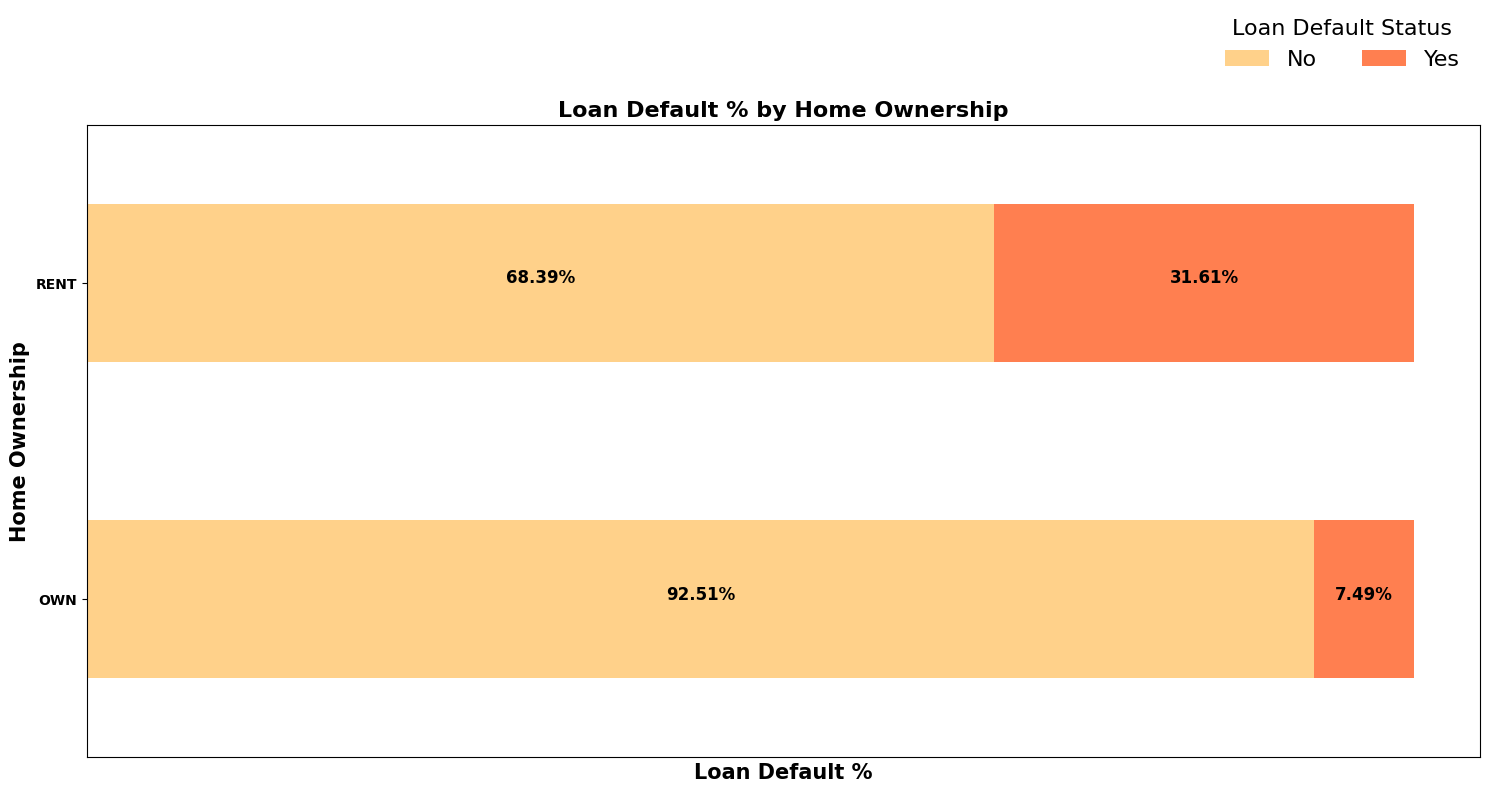

In [102]:
# Plotting a stacked bar chart to visualize the Percentage of loan defaults by Home Ownership

contingency_percent = round(contingency_table.divide(contingency_table.sum(axis = 1), axis = 0) * 100, 2)
fig, ax = plt.subplots(1, 1, figsize = (15, 8))
contingency_percent.plot(kind = 'barh', stacked = True, color = ["#FFD18A", "#FF7F50"], ax = ax)
plt.title("Loan Default % by Home Ownership", weight = 'bold', size = 16)
plt.legend(title = 'Loan Default Status', ncols = 2, bbox_to_anchor = (1, 1.2), labels = ["No", "Yes"], 
           fontsize = 16, frameon = False, title_fontsize = 16)
plt.xlabel("Loan Default %", weight = 'bold', size = 15)
plt.xticks([])
plt.ylabel("Home Ownership", weight = 'bold', size = 15)
plt.yticks(ax.get_yticks(), weight = 'bold', size = 10)
for bars in ax.patches:
    if bars.get_width() > 0:
        height = bars.get_height()
        width = bars.get_width()
        x, y = bars.get_xy()
        ax.text(x = x + width / 2 , y = y + height / 2, s = str(round(width, 2)) + '%', ha = 'center', 
                weight = 'bold', size = 12)
plt.tight_layout()
plt.show()

#### **Conclusion:**

#### Home Ownership a factor that has a significant impact on the loan default status. Generally, home owners are less likely to default than their counterparts. Loans from home renters can be subjected to  greater examination.

---
---
---
---

### 5. Is there a significant income difference between those with and without loan defaults?

#### Test for Normality:

#### Test to be performed: **Anderson-Darling Test**

#### Hypotheses:

#### H0: The data is normally distributed.
#### H1: The data is not normally distributed.

In [171]:
# Performing Anderson-Darling Test and computing the critical value

test_statistic, critical_values, significance_levels = stats.anderson(credit_risk['person_income'], dist = 'norm')[:3]
index = list(significance_levels).index(alpha * 100)
print("A-Squared Statistic:", round(test_statistic, 2))
print("\nCritical Value:", critical_values[index])
if test_statistic > critical_values[index]:
    print("\nConclusion: Reject H0 and conclude that the data is not normally distributed.")
else:
    print("\nConclusion: Fail to reject H0 and conclude that the data is normally distributed.")


A-Squared Statistic: 677.94

Critical Value: 0.787

Conclusion: Reject H0 and conclude that the data is not normally distributed.


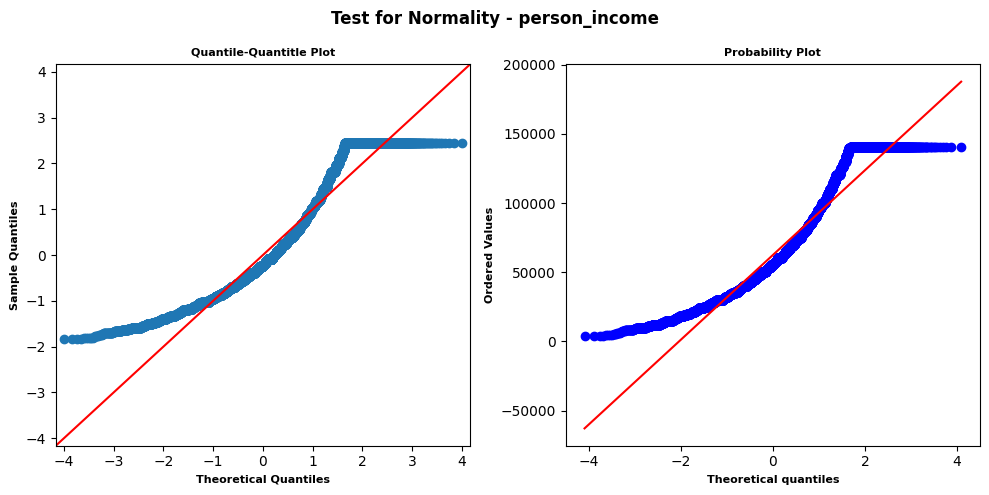

In [103]:
# Visualizing if the person income column follows a normal distribution

normality_test('person_income') # Input Column: person_income

#### Note: 

The **person_income** column does not fully follow a normal distribution especially at the tails. This is also confirmed by the Anderson-Darling Test. Even though the **T-test for Independent Samples** is technically feasible here due to the application of the **Central Limit Theorem (CLT)**, it is better to opt for a non-parameteric counterpart which in this case is the **Mann-Whitney U Test**. This test tests for the **rank sum deviations** between the 2 samples instead of the **mean deviations**.

#### Test to be performed: **Maan-Whitney U Test**

#### Hypotheses:

#### H0: There is no difference in the rank sums of the incomes between the 2 groups.
#### H1: There is a significant difference in the rank sums of incomes between the 2 groups.

In [174]:
# Performing Mann_Whitney U Test and computing the P-value

income_default = credit_risk.query("loan_status_coded == 'Yes'")['person_income']
income_non_default = credit_risk.query("loan_status_coded == 'No'")['person_income']

u_statistic, p_value = stats.mannwhitneyu(x = income_default, y = income_non_default, alternative = 'two-sided')
print("U-Test Statistic:", round(u_statistic, 2))
print("\nAlpha:", alpha)
print("\nP-Value:", p_value)
if(p_value < alpha):
    print("\nConclusion: Reject H0 and conclude that there is a significant difference in the rank sums of the incomes between the 2 groups.")
else:
    print("\nConclusion: Fail to reject H0 and conclude that there is no difference in the rank sums of the incomes between the 2 groups.")

U-Test Statistic: 55642897.0

Alpha: 0.05

P-Value: 0.0

Conclusion: Reject H0 and conclude that there is a significant difference in the rank sums of the incomes between the 2 groups.


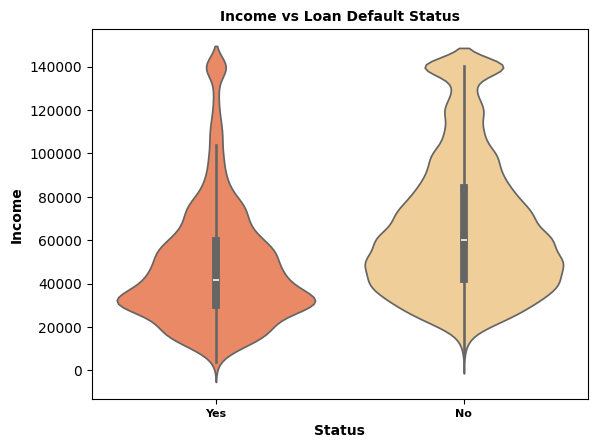

In [105]:
# Plotting a violin plot and visualizing the distribution of Income by Loan Default Status

ax = sns.violinplot(data = credit_risk, x = 'loan_status_coded', y = 'person_income', 
                    hue = 'loan_status_coded', palette = ["#FF7F50", "#FFD18A"])
plt.title("Income vs Loan Default Status", weight = 'bold', size = 10)
plt.xlabel("Status", weight = 'bold', size = '10')
plt.xticks(ax.get_xticks(), labels = ['Yes', 'No'], weight = 'bold', size = 8)
plt.ylabel("Income", weight = 'bold', size = '10')
plt.show()

#### **Conclusion:**

#### Income is a factor which has moderate impact on loans defaults. In general, people with defaulted loans typically earn around 28000 - 35000 where as those who aren't defaulted typically earn around 40000 - 45000.

---
---
---
---

### 6. Does the combination of low income and high loan amount increase default risk significantly?

In [175]:
# Discretization of Person Income and Loan Amount into 3 Quantiles

# Income Bracket

income_labels = ['Low Income', 'Medium Income', 'High Income']
credit_risk['Income Bracket'] = pd.qcut(credit_risk['person_income'], q = 3, labels = income_labels)

# Loan Bracket

loan_labels = ['Small Loan', 'Medium Loan', 'High Loan']
credit_risk['Loan Bracket'] = pd.qcut(credit_risk['loan_amnt'], q = 3, labels = loan_labels)

credit_risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status_coded,age_group,Income Bracket,Loan Bracket
0,22.0,59000.0,RENT,14.5,PERSONAL,D,23125.0,16.02,1,0.44,Y,3.0,Yes,Young Adults,Medium Income,High Loan
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0,0.10,N,2.0,No,Young Adults,Low Income,Small Loan
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1,0.44,N,3.0,Yes,Young Adults,Low Income,Small Loan
3,23.0,65500.0,RENT,4.0,MEDICAL,C,23125.0,15.23,1,0.44,N,2.0,Yes,Young Adults,Medium Income,High Loan
4,24.0,54400.0,RENT,8.0,MEDICAL,C,23125.0,14.27,1,0.44,Y,4.0,Yes,Young Adults,Medium Income,High Loan


In [176]:
# Creating a contigency table between Income, Loan Bracket combination and Loan Default Status

contingency_table = pd.crosstab([credit_risk['Income Bracket'], credit_risk['Loan Bracket']], credit_risk['loan_status_coded'])
contingency_table

loan_status_coded              No   Yes
Income Bracket Loan Bracket            
Low Income     Small Loan    4151  1738
               Medium Loan   2116  1135
               High Loan      638  1036
Medium Income  Small Loan    3473   451
               Medium Loan   3105   417
               High Loan     2541  1145
High Income    Small Loan    2162   151
               Medium Loan   2504   233
               High Loan     4637   783

#### Test to be performed: **Chi-Squared Test for the Test of Independence**.

#### Hypotheses:

#### H0: There is no relationship between low income, high loan combination and loan defaults.
#### H1: There is a relationship between low income, high loan combination and loan defaults.

In [178]:
# Performing Chi-Squared Test for Independence and computing the P-value

chi_squared_statistic, p_value = stats.chi2_contingency(contingency_table)[:2]
print("Chi-Squared Test Statistic:", round(chi_squared_statistic, 2))
print("\nAlpha:", alpha)
print("\nP-Value:", p_value)
if(p_value < alpha):
    print("\nConclusion: Reject H0 and conclude that there is a relationship between low income, high loan combination and loan defaults.")
else:
    print("\nConclusion: Fail to reject H0 and conclude that there is no relationship between low income, high loan combination and loan defaults.")


Chi-Squared Test Statistic: 3510.13

Alpha: 0.05

P-Value: 0.0

Conclusion: Reject H0 and conclude that there is a relationship between low income, high loan combination and loan defaults.


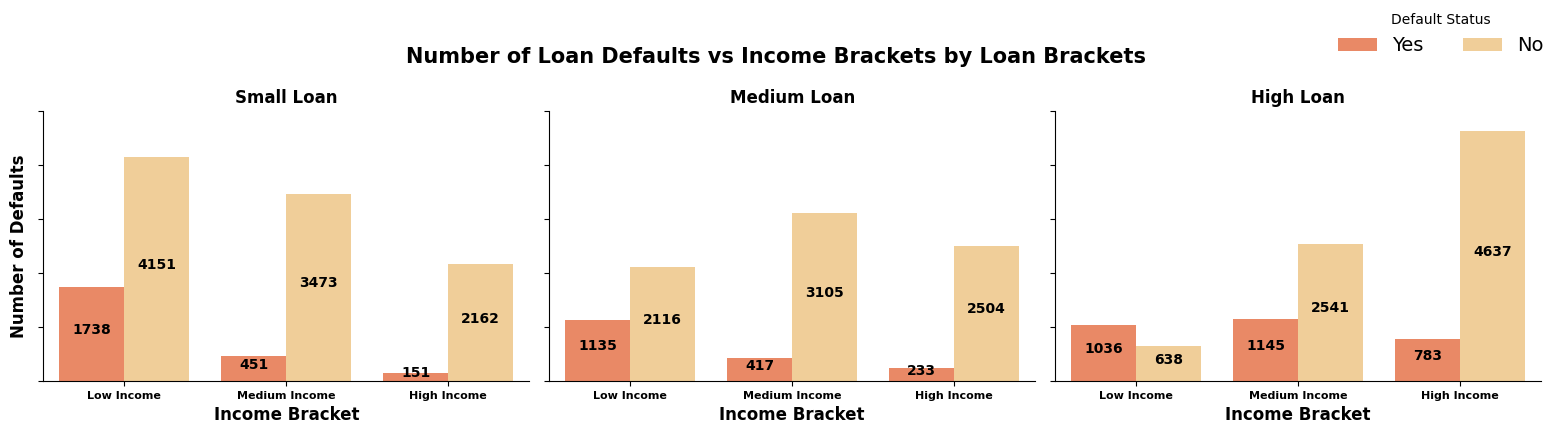

In [109]:
# Plotting a count plot and visualizing the Number of Loan Defaults vs Income Brackets by different Loan Brackets

g = sns.catplot(data = credit_risk, x = "Income Bracket", hue = "loan_status_coded", 
            col = "Loan Bracket", kind = "count", height = 4, palette = ["#FF7F50", "#FFD18A"])
g.figure.suptitle("Number of Loan Defaults vs Income Brackets by Loan Brackets", weight = 'bold', size = 15)
for ax, new_title in zip(g.axes.flat, ["Small Loan", "Medium Loan", "High Loan"]):
    ax.set_title(new_title, weight = 'bold')
g.set_axis_labels("Income Bracket", "Number of Defaults", weight = 'bold', size = 12)
g.set_xticklabels(labels = ['Low Income', 'Medium Income', 'High Income'], weight = 'bold', size = 8)
g.set_yticklabels([])
g._legend.remove()
g.add_legend(title = "Default Status", label_order = ["Yes", 'No'],  prop = {'size': 14}, ncols = 2)
g._legend.set_bbox_to_anchor((1, 1))
plt.tight_layout()
for ax in g.axes.flat:
    for bars in ax.patches:
        if bars.get_height() > 0:
            height = bars.get_height()
            width = bars.get_width()
            x, y = bars.get_xy()
            ax.text(x = x + width / 2, y = y + height / 2, s = int(height), ha = 'center', weight = 'bold')
plt.show()

#### **Conclusion:**

#### Over 60% of the loans in the low income, high loan amount combination defaulted. So, the loan default risk is significant for this combination.

---
---
---
---

### 7. Is there a significant relationship between the loan interest rate and the loan default status?

#### Test for Normality:

#### Test to be performed: **Anderson-Darling Test**

#### Hypotheses:

#### H0: The data is normally distributed.
#### H1: The data is not normally distributed.

In [151]:
# Performing Anderson-Darling Test and computing the critical value

test_statistic, critical_values, significance_levels = stats.anderson(credit_risk['loan_int_rate'], dist = 'norm')[:3]
index = list(significance_levels).index(alpha * 100)
print("A-Squared Statistic:", round(test_statistic, 2))
print("\nCritical Value:", critical_values[index])
if test_statistic > critical_values[index]:
    print("\nConclusion: Reject H0 and conclude that the data is not normally distributed.")
else:
    print("\nConclusion: Fail to reject H0 and conclude that the data is normally distributed.")


A-Squared Statistic: 226.97

Critical Value: 0.787

Conclusion: Reject H0 and conclude that the data is not normally distributed.


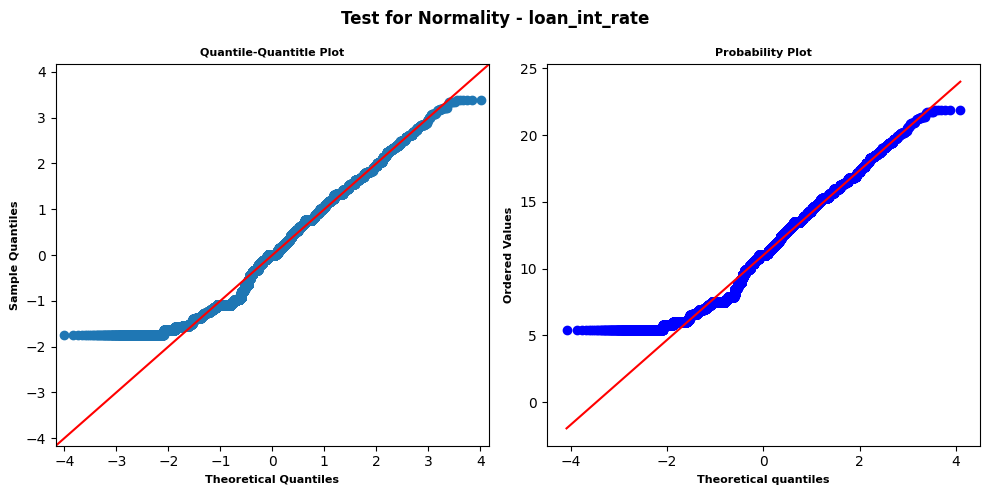

In [110]:
# Visualizing if the person income column follows a normal distribution

normality_test('loan_int_rate') # Input Column: loan_int_rate

#### Note: 

The **loan_int_rate** column does not fully follow a normal distribution especially at the lower tail. This is also confirmed by the Anderson-Darling Test. Even though the **T-test for Independent Samples** is technically feasible here due to the application of the **Central Limit Theorem (CLT)**, it is better to opt for a non-parameteric counterpart which in this case is the **Mann-Whitney U Test**. This test tests for the rank sum deviations between the 2 samples instead of the mean deviations.

#### Test to be performed: **Maan-Whitney U Test**

#### Hypotheses:

#### H0: There is no difference in the rank sums of the loan interest rates between the 2 groups.
#### H1: There is a significant difference in the rank sums of the loan interest rates between the 2 groups.

In [179]:
# Performing Mann_Whitney U Test and computing the P-value

loan_int_rate_default = credit_risk.query("loan_status_coded == 'Yes'")['loan_int_rate']
loan_int_rate_non_default = credit_risk.query("loan_status_coded == 'No'")['loan_int_rate']

u_statistic, p_value = stats.mannwhitneyu(x = loan_int_rate_default, y = loan_int_rate_non_default, alternative = 'two-sided')
print("U-Test Statistic:", round(u_statistic, 2))
print("\nAlpha:", alpha)
print("\nP-Value:", p_value)
if(p_value < alpha):
    print("\nConclusion: Reject H0 and conclude that there is a significant difference in the rank sums of the loan interest rates between the 2 groups.")
else:
    print("\nConclusion: Fail to reject H0 and conclude that there is no difference in the rank sums of the loan interest rates between the 2 groups.")

U-Test Statistic: 129703189.0

Alpha: 0.05

P-Value: 0.0

Conclusion: Reject H0 and conclude that there is a significant difference in the rank sums of the loan interest rates between the 2 groups.


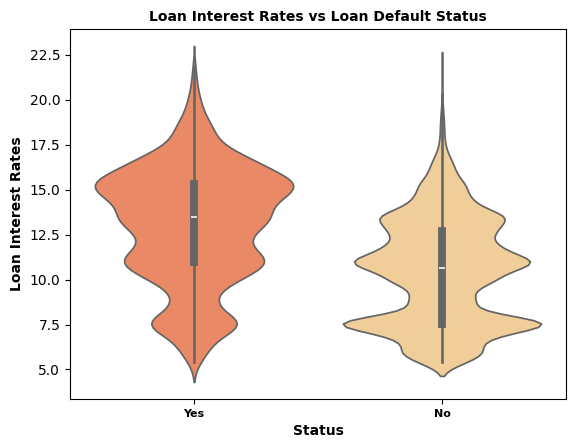

In [147]:
# Plotting a violin plot and visualizing the distribution of Loan Interest Rates by Loan Default Status

ax = sns.violinplot(data = credit_risk, x = 'loan_status_coded', y = 'loan_int_rate', 
                    hue = 'loan_status_coded', palette = ["#FF7F50", "#FFD18A"])
plt.title("Loan Interest Rates vs Loan Default Status", weight = 'bold', size = 10)
plt.xlabel("Status", weight = 'bold', size = '10')
plt.xticks(ax.get_xticks(), labels = ['Yes', 'No'], weight = 'bold', size = 8)
plt.ylabel("Loan Interest Rates", weight = 'bold', size = '10')
plt.show()

#### **Conclusion:**

#### Yes, there is a significant difference between people who default vs those who don't. Majority of the people who default have higher loan interest rates of around 15% when compared to their counterparts who have around 7.5%

---
---
---
---

### 8. How does the loan-income ratio relate to loan default status?

#### Test for Normality:

#### Test to be performed: **Anderson Darling Test**

#### Hypotheses:

#### H0: The data is normally distributed.
#### H1: The data is not normally distributed.

In [150]:
# Performing Anderson-Darling Test and computing the critical value

test_statistic, critical_values, significance_levels = stats.anderson(credit_risk['loan_percent_income'], dist = 'norm')[:3]
index = list(significance_levels).index(alpha * 100)
print("A-Squared Statistic:", round(test_statistic, 2))
print("\nCritical Value:", critical_values[index])
if test_statistic > critical_values[index]:
    print("\nConclusion: Reject H0 and conclude that the data is not normally distributed.")
else:
    print("\nConclusion: Fail to reject H0 and conclude that the data is normally distributed.")


A-Squared Statistic: 554.2

Critical Value: 0.787

Conclusion: Reject H0 and conclude that the data is not normally distributed.


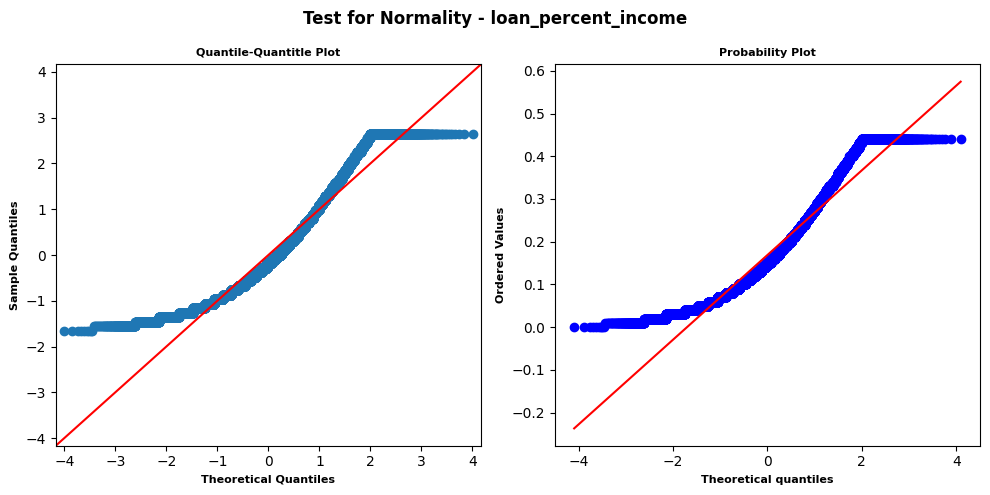

In [46]:
# Visualizing if the person income column follows a normal distribution

normality_test('loan_percent_income') # Input Column: loan_percent_income

#### Note: 

The **loan_percent_income** column does not fully follow a normal distribution especially at the tails.  This is also confirmed by the Anderson-Darling Test. Even though the **T-test for Independent Samples** is technically feasible here due to the application of the **Central Limit Theorem (CLT)**, it is better to opt for a non-parameteric counterpart which in this case is the **Mann-Whitney U Test**. This test tests for the rank sum deviations between the 2 samples instead of the mean deviations.

#### Test to be performed: **Maan-Whitney U Test**

#### Hypotheses:

#### H0: There is no difference in the rank sums of the loan income ratios between the 2 groups.
#### H1: There is a significant difference in the rank sums of the loan income ratios between the 2 groups.

In [180]:
# Performing Mann_Whitney U Test and computing the P-value

loan_income_ratio_default = credit_risk.query("loan_status_coded == 'Yes'")['loan_percent_income']
loan_income_ratio_non_default = credit_risk.query("loan_status_coded == 'No'")['loan_percent_income']

u_statistic, p_value = stats.mannwhitneyu(x = loan_income_ratio_default, y = loan_income_ratio_non_default, alternative = 'two-sided')
print("U-Test Statistic:", round(u_statistic, 2))
print("\nAlpha:", alpha)
print("\nP-Value:", p_value)
if(p_value < alpha):
    print("\nConclusion: Reject H0 and conclude that there is a significant difference in the rank sums of the loan income ratios between the 2 groups.")
else:
    print("\nConclusion: Fail to reject H0 and conclude that there is no difference in the rank sums of the loan income ratios between the 2 groups.")

U-Test Statistic: 129436607.0

Alpha: 0.05

P-Value: 0.0

Conclusion: Reject H0 and conclude that there is a significant difference in the rank sums of the loan income ratios between the 2 groups.


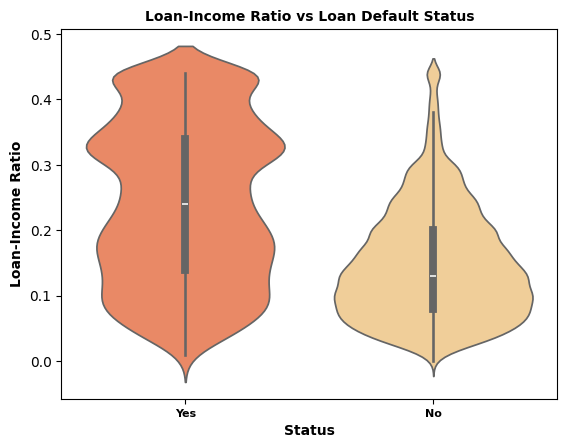

In [48]:
# Plotting a violin plot and visualizing the distribution of Income by Loan Default Status

ax = sns.violinplot(data = credit_risk, x = 'loan_status_coded', y = 'loan_percent_income', 
                    hue = 'loan_status_coded', palette = ["#FF7F50", "#FFD18A"])
plt.title("Loan-Income Ratio vs Loan Default Status", weight = 'bold', size = 10)
plt.xlabel("Status", weight = 'bold', size = '10')
plt.xticks(ax.get_xticks(), labels = ['Yes', 'No'], weight = 'bold', size = 8)
plt.ylabel("Loan-Income Ratio", weight = 'bold', size = '10')
plt.show()

#### **Conclusion:**

#### Loan-Income Ratio is a factor that is derived from loan amount and income. Since, both loan amount and income directly affect the loan default status, this derived metric also impacts the same. In general, people with defaulted loans typically have Loan-Income Ratio between 0.35 - 0.37 where as those who aren't defaulted typically earn around 0.1 - 0.4.

---
---
---
---

## Summary:

|Risk Factor|Test Used|Statistically Significant? |  Insights                                                                 |
|-----------------------------------|-------------------------|----------------------------|------------------------------------------------------------------------------|
| **Age Group**                     | Chi-Squared             | ❌ No                      | Default rates are similar across age brackets.                               |
| **Loan Intent**                   | Chi-Squared             | ✅ Yes                     | Medical loans have highest default rates and Ventures have the lowest.               |
| **Loan Grade**                    | Chi-Squared             | ✅ Yes                     | Grades E, F and G show significant risk where as Grade A is the safest.                        |
| **Home Ownership (Own vs Rent)**  | Chi-Squared             | ✅ Yes                     | Renters default more than owners.                                            |
| **Income Level**                  | Mann-Whitney U          | ✅ Yes                     | Defaulters earn ~28–35K and non-defaulters earn ~40–45K.                             |
| **Income + Loan Combo**           | Chi-Squared             | ✅ Yes                     | 60% default rate in low-income + high-loan bracket.                          |
| **Loan Interest Rate**            | Mann-Whitney U          | ✅ Yes                     | Defaulters average ~15% interest and non-defaulters average ~7.5%.                      |
| **Loan-Income Ratio**             | Mann-Whitney U          | ✅ Yes                     | Higher loan-to-income ratios correlate with loan defaults.                         |